# Notebook Imports and Packages

In [57]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #color map

from sympy import symbols,diff

%matplotlib inline

# Example 1 - A simple cost function

## $f(x) = x^2 + x + 1$   

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

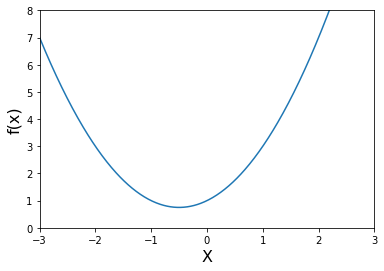

In [4]:
# Plot
plt.xlim([-3, 3])
plt.ylim(0,8)
plt.xlabel('X',fontsize = 16)
plt.ylabel('f(x)',fontsize = 16)
plt.plot(x_1,f(x_1))
plt.show()

## Slope & Derivatives

In [5]:
# defining derivative for x**2 + x + 1
def df(x):
    return 2*x+1

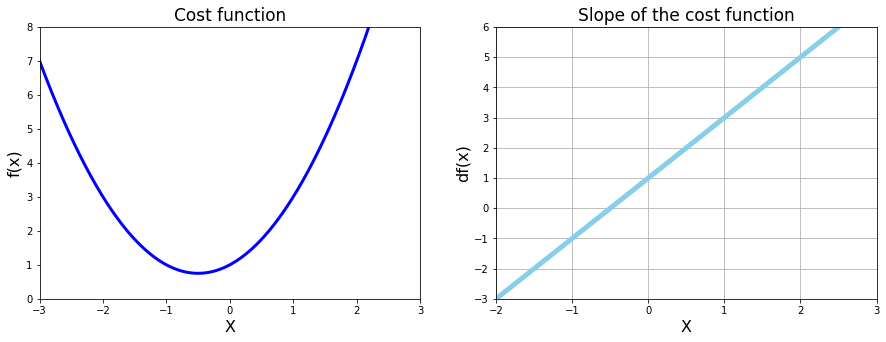

In [6]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

# 1 chart: cost function
plt.subplot(1,2,1)

plt.xlim(-3, 3)
plt.ylim(0,8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('f(x)',fontsize = 16)

plt.plot(x_1,f(x_1), color='blue', linewidth = 3)


# chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('df(x)',fontsize = 16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3,6)

plt.plot(x_1,df(x_1),color='skyblue', linewidth= 5)

           
plt.show()


## Python Loops & Gradient Descent

In [7]:
# Python For Loop
for n in range(5):
    print('Hello world',n)
print('End of loop')

Hello world 0
Hello world 1
Hello world 2
Hello world 3
Hello world 4
End of loop


In [8]:
# Python while loop
counter = 0 
while counter < 7:
    print('counting....',counter)
    counter = counter+1
print('Ready or not, her I come!')

counting.... 0
counting.... 1
counting.... 2
counting.... 3
counting.... 4
counting.... 5
counting.... 6
Ready or not, her I come!


In [9]:
# Gradient Descent
new_x = 3
previous_x = 0
step_mulitplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]


for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x- step_mulitplier * gradient
    step_size = abs(new_x-previous_x)
    #print(step_size)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    if step_size < precision:
        print('Loop ran this many times:',n)
        break
    
print('Local minimum occurs at:',new_x)
print('Sloper or df(x) value at this point is:',df(new_x))
print('f(x) value or cost at this point is:',f(new_x))

Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Sloper or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


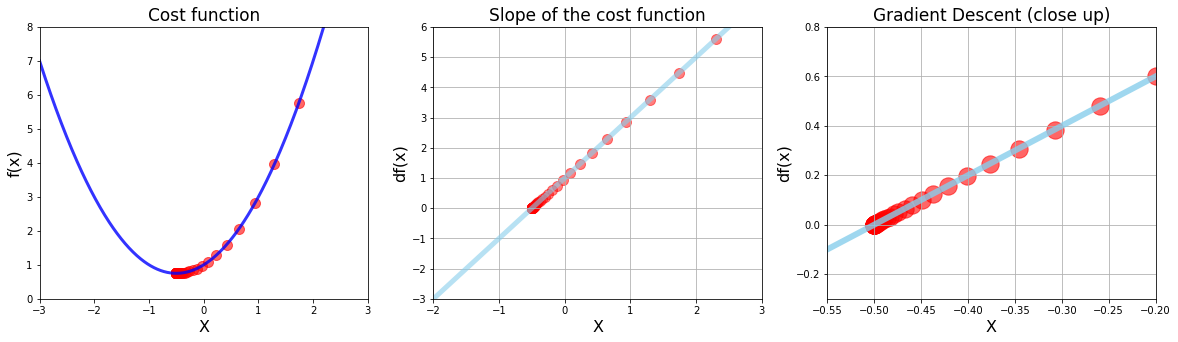

In [10]:
# Superimpose the gradient descent calculations

plt.figure(figsize=[20,5])

# 1 chart: cost function
plt.subplot(1,3,1)

plt.xlim(-3, 3)
plt.ylim(0,8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('f(x)',fontsize = 16)

plt.plot(x_1,f(x_1), color='blue', linewidth = 3,alpha = 0.8)

values = np.array(x_list)
plt.scatter(x_list,f(values), color = 'red', s = 100,alpha = 0.6)


# chart: Derivative
plt.subplot(1,3,2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('df(x)',fontsize = 16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3,6)

plt.plot(x_1,df(x_1),color='skyblue', linewidth= 5,alpha = 0.6)
plt.scatter(x_list,slope_list,color = 'red',s = 100, alpha = 0.5)

# chart: Derivative (Close up)

plt.subplot(1,3,3)
plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('df(x)',fontsize = 16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3,0.8)

plt.plot(x_1,df(x_1),color='skyblue', linewidth= 6,alpha = 0.8)
plt.scatter(x_list,slope_list,color = 'red',s = 300, alpha = 0.6)

           
plt.show()


# Example 2 - Multiple Minimum vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [11]:
# Make some dataa
x_2 = np.linspace(-2,2,1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

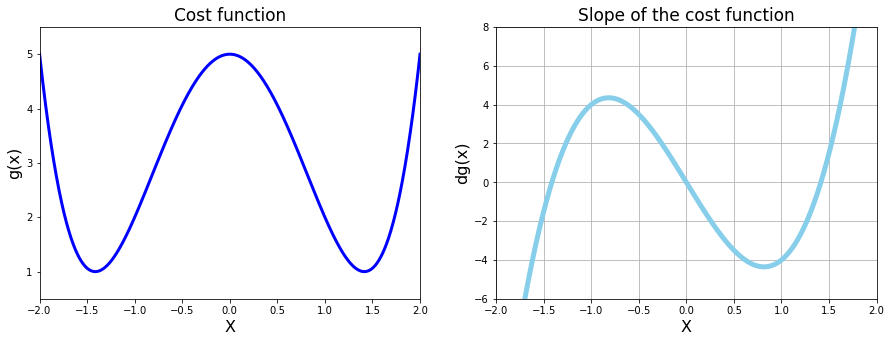

In [12]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

# 1 chart: cost function
plt.subplot(1,2,1)

plt.xlim(-2, 2)
plt.ylim(0.5,5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('g(x)',fontsize = 16)

plt.plot(x_2,g(x_2), color='blue', linewidth = 3)


# chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('dg(x)',fontsize = 16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6,8)

plt.plot(x_2,dg(x_2),color='skyblue', linewidth= 5)

           
plt.show()


## Gradient Descent as a Python Function

In [13]:
def gradient_descent(derivative_func, initial_guess,multiplier = 0.02,precision = 0.001,max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]


    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x- multiplier * gradient
        step_size = abs(new_x-previous_x)
        
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        if step_size < precision:
            break
    return new_x,x_list,slope_list


In [14]:
local_min, list_x,deriv_list = gradient_descent(dg,0.5,0.02,0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [15]:
local_min, list_x,deriv_list = gradient_descent(derivative_func= dg ,initial_guess = -0.5, multiplier = 0.02, precision = 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4122375085019094
Number of steps: 23


In [16]:
local_min, list_x,deriv_list = gradient_descent(derivative_func= dg ,initial_guess = -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


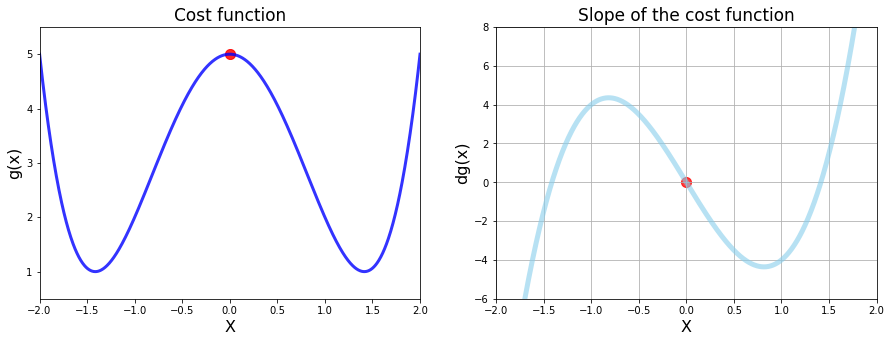

In [17]:
# calling gradient descent function
local_min, list_x,deriv_list = gradient_descent(derivative_func= dg ,
                                               initial_guess = 0)
# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# 1 chart: cost function
plt.subplot(1,2,1)

plt.xlim(-2, 2)
plt.ylim(0.5,5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('g(x)',fontsize = 16)

plt.plot(x_2,g(x_2), color='blue', linewidth = 3, alpha = 0.8)
plt.scatter(list_x,g(np.array(list_x)), color = 'red', s=100, alpha = 0.6)


# chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('dg(x)',fontsize = 16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6,8)

plt.plot(x_2,dg(x_2),color='skyblue', linewidth= 5, alpha = 0.6)
plt.scatter(list_x,deriv_list,color='red',s=100,alpha = 0.5)

           
plt.show()


# Example 3 - Divergence, Overflow and Python Tuples

## $$h(x) = x^5 - 2x^4 + 2$$

In [18]:
# Make data
x_3 = np.linspace(start=-2.5,stop=2.5,num=1000)

def h(x):
    return x**5 - 2*x**4 + 2
def dh(x):
    return 5*x**4 - 8*x**3

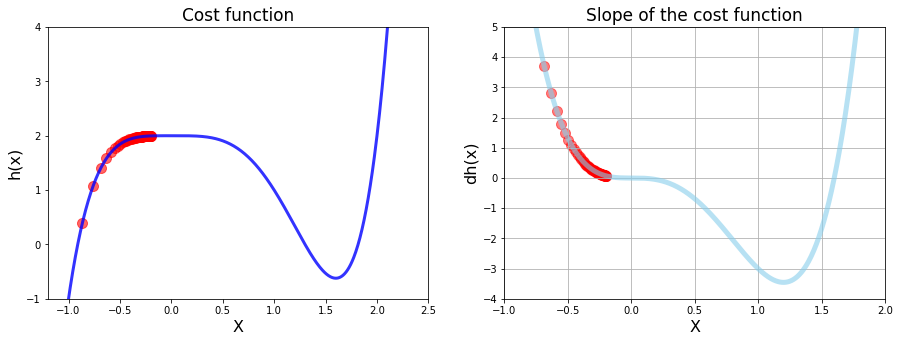

Local min occurs at: -1.8398461123332792e+24
Cost at this minimum is: -2.1081790694225687e+121
Number of steps: 72


In [19]:
# calling gradient descent function
local_min, list_x,deriv_list = gradient_descent(derivative_func = dh ,
                                               initial_guess = -0.2,max_iter =71)
# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# 1 chart: cost function
plt.subplot(1,2,1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1,4)

plt.title('Cost function', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('h(x)',fontsize = 16)

plt.plot(x_3, h(x_3), color='blue', linewidth = 3, alpha = 0.8)
plt.scatter(list_x,h(np.array(list_x)), color = 'red', s=100, alpha = 0.6)


# chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('dh(x)',fontsize = 16)
plt.grid()
plt.xlim(-1, 2)
plt.ylim(-4,5)

plt.plot(x_3,dh(x_3),color='skyblue', linewidth= 5, alpha = 0.6)
plt.scatter(list_x,deriv_list,color='red',s=100,alpha = 0.5)

           
plt.show()

print('Local min occurs at:', local_min)
print('Cost at this minimum is:', h(local_min))
print('Number of steps:', len(list_x))

In [20]:
import sys
#sys.version
#type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [21]:
# Creating a tuple - tuple packing
breakfast = 'bacon', 'eggs' , 'avacado'
unlucky_number = 13, 4 , 9, 26, 17

print('I loooove',breakfast)
print('My hotel has no '+str(unlucky_number[1]) + 'th floor')

#Tuples are often used for data that are hetrogenous

not_my_address = 1, 'Infinite Loop', 'Cupertino', 95014
#breakfast[0] = 'sausage'  #tuples are immutable(we can change or asign values to defined tuples)
tuple_with_single_value = 'hello',
type(tuple_with_single_value)

main, side, greens = breakfast
print('Main course is',main)

data_tuple = gradient_descent(derivative_func =dh, initial_guess = 0.2)
print('Local min is',data_tuple[0])
print('cost at the last x value is',h(data_tuple[0]))
print('Number of steps is',len(data_tuple[1]))

I loooove ('bacon', 'eggs', 'avacado')
My hotel has no 4th floor
Main course is bacon
Local min is 1.5989534547394717
cost at the last x value is -0.6214287992331258
Number of steps is 117


# The Learning Rate

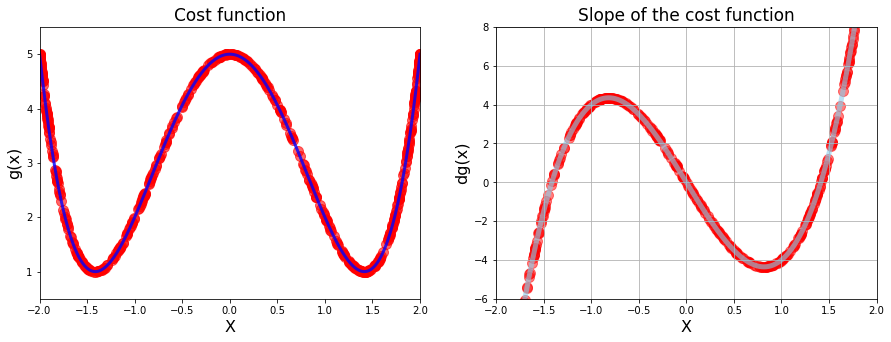

Number of steps is 501


In [25]:
# calling gradient descent function
local_min, list_x,deriv_list = gradient_descent(derivative_func= dg ,
                                               initial_guess = 1.9,multiplier = 0.02,max_iter = 500)
# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# 1 chart: cost function
plt.subplot(1,2,1)

plt.xlim(-2, 2)
plt.ylim(0.5,5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('g(x)',fontsize = 16)

plt.plot(x_2,g(x_2), color='blue', linewidth = 3, alpha = 0.8)
plt.scatter(list_x,g(np.array(list_x)), color = 'red', s=100, alpha = 0.6)


# chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('dg(x)',fontsize = 16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6,8)

plt.plot(x_2,dg(x_2),color='skyblue', linewidth= 5, alpha = 0.6)
plt.scatter(list_x,deriv_list,color='red',s=100,alpha = 0.5)

           
plt.show()
print('Number of steps is',len(list_x))


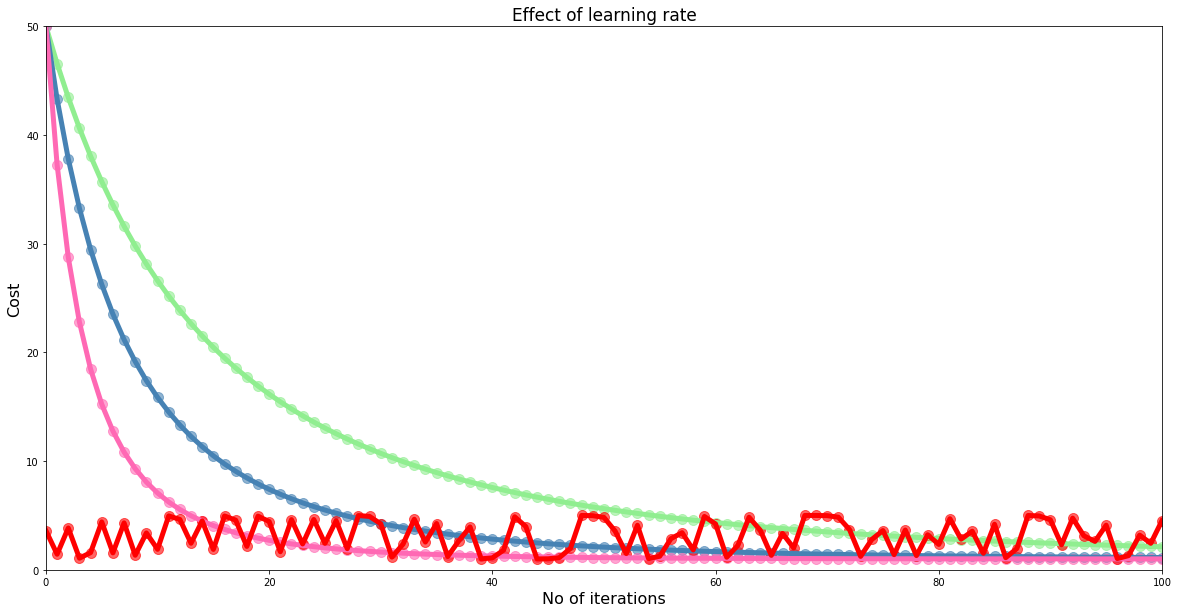

In [35]:
# Run gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func= dg ,
                                               initial_guess = 3,multiplier = 0.0005,precision = 0.0001,max_iter = n)


mid_gamma = gradient_descent(derivative_func= dg ,
                                               initial_guess = 3,multiplier = 0.001,precision = 0.0001,max_iter = n)

high_gamma = gradient_descent(derivative_func= dg ,
                                               initial_guess = 3,multiplier = 0.002,precision = 0.0001,max_iter = n)

#expirement
insane_gamma = gradient_descent(derivative_func= dg ,
                                               initial_guess = 1.9,multiplier = 0.25,precision = 0.0001,max_iter = n)
# Plotting reduction in cost for each iteration

plt.figure(figsize=[20,10])

# 1 chart: cost function


plt.xlim(0, n)
plt.ylim(0,50)

plt.title('Effect of learning rate', fontsize=17)
plt.xlabel('No of iterations',fontsize = 16)
plt.ylabel('Cost',fontsize = 16)

#Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])


# 2) X Axis Data: Create a list from 0 t0 n+1
iteration_list = list(range(0,n+1))

#Plotting low learning rate
plt.plot(iteration_list,g(low_values), color='lightgreen', linewidth = 5)
plt.scatter(iteration_list,g(low_values), color = 'lightgreen', s=100, alpha = 0.6)

#Plotting mid learning rate
plt.plot(iteration_list,g(np.array(mid_gamma[1])), color='steelblue', linewidth = 5)
plt.scatter(iteration_list,g(np.array(mid_gamma[1])), color = 'steelblue', s=100, alpha = 0.6)

#Plotting high learning rate
plt.plot(iteration_list,g(np.array(high_gamma[1])), color='hotpink', linewidth = 5)
plt.scatter(iteration_list,g(np.array(high_gamma[1])), color = 'hotpink', s=100, alpha = 0.6)

#plotting insane learning rate
plt.plot(iteration_list,g(np.array(insane_gamma[1])), color='red', linewidth = 5)
plt.scatter(iteration_list,g(np.array(insane_gamma[1])), color = 'red', s=100, alpha = 0.6)

plt.show()

# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x,y) = \frac{1}{3^{-x^2 -y^2} + 1}$$

Minimise $$f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2 -y^2}+1$

In [36]:
def f(x, y):
    r = 3**(-x**2-y**2)
    return 1/(r+1)

In [46]:
# Make our x and y data
x_4 = np.linspace(start=-2,stop=2, num =200)
y_4 = np.linspace(start=-2,stop=2, num = 200)

print('Shape of X array',x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)

print('Array after meshgrid',x_4.shape)


Shape of X array (200,)
Array after meshgrid (200, 200)


C:\Users\Acer\AppData\Local\Temp\ipykernel_2124\2528937189.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


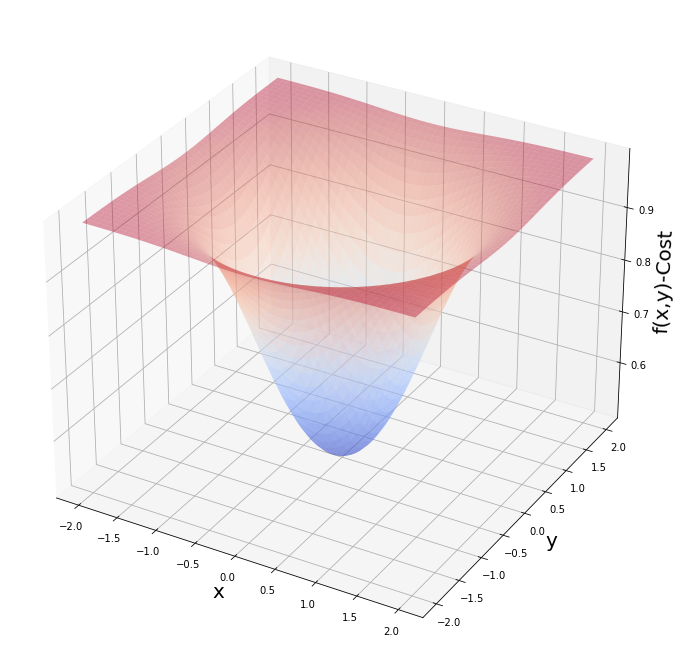

In [56]:
# Generating 3D Plot
fig = plt.figure(figsize = [16,12])
ax = fig.gca(projection = '3d')

ax.set_xlabel('x',fontsize = 20)
ax.set_ylabel('y',fontsize = 20)
ax.set_zlabel('f(x,y)-Cost',fontsize = 20)

ax.plot_surface(x_4,y_4,f(x_4,y_4),cmap=cm.coolwarm,alpha=0.4)
plt.show()


## Partial Derivatives & Symbolic Computation

In [70]:
a,b = symbols('x, y')
print('Our cost function f(x,y) is:',f(a, b))
diff(f(a,b), a)
print('Partial derivative wrt x is:', diff(f(a,b),a))
print('Value of f(x,y) at x = 1.8 y = 1.0 is:',f(a, b).evalf(subs={a:1.8,b:1.0})) #Python Dictionary 
print('Value of slope at x = 1.8 y = 1.0 is:',diff(f(a, b),a).evalf(subs={a:1.8,b:1.0}))

Our cost function f(x,y) is: 1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x = 1.8 y = 1.0 is: 0.990604794032582
Value of slope at x = 1.8 y = 1.0 is: 0.0368089716197505


## 